In [4]:
import numpy as np
import matplotlib.pyplot as plt

<a name="diffeq"></a>
### Solving differential equations

(adapted from Physics 105)

#### Euler method

The Euler method is the simplest, most naive integrator, but is __extremely inaccurate__.

We can solve initial value problems by simulating the system using finite differences like we did for differentiation. For example, if we have equations of motion 
$$\frac{d^2 x}{dt^2} = \ddot{x}=f(\dot{x},x,t),$$
and initial conditions for $x$ and $\dot x$, then we would discretise time, and update $x$ and $\dot x$ at each step according to 
$$x_{i+1}=x_i+\dot x_i \Delta t_i,\\\dot x_{i+1} = \dot{x_i}+f(\dot{x}_i,x_i,t_i)\Delta t_i.$$
This is known as [Euler's method](https://en.wikipedia.org/wiki/Euler_method).

In [5]:
def euler_method(t, x0, v0, fn):
    N = len(t)
    x = np.zeros((N,len(x0))) #for n-dimensional positions, velocities
    v = np.zeros((N,len(v0)))
    x[0] = x0
    v[0] = v0
    for i in range(1,N):
        dt = t[i] - t[i-1]
        x[i] = x[i-1] + v[i-1]*dt
        v[i] = v[i-1] + fn(x[i-1],v[i-1],t[i-1])*dt
    return x, v

Energy is not conserved by the Euler method!

Let's simulate simple harmonic oscillation, $\frac{d^2 x}{dt^2} = \ddot{x} = f(\dot{x},x,t)=-\omega^2 x$.

where $$\omega = \sqrt{\frac{k}{m}}$$

<img src="https://upload.wikimedia.org/wikipedia/commons/2/25/Animated-mass-spring.gif" alt="spring gif">

Energy conservation says $$E = \frac{1}{2} mv^2 + \frac{1}{2} k x^2$$


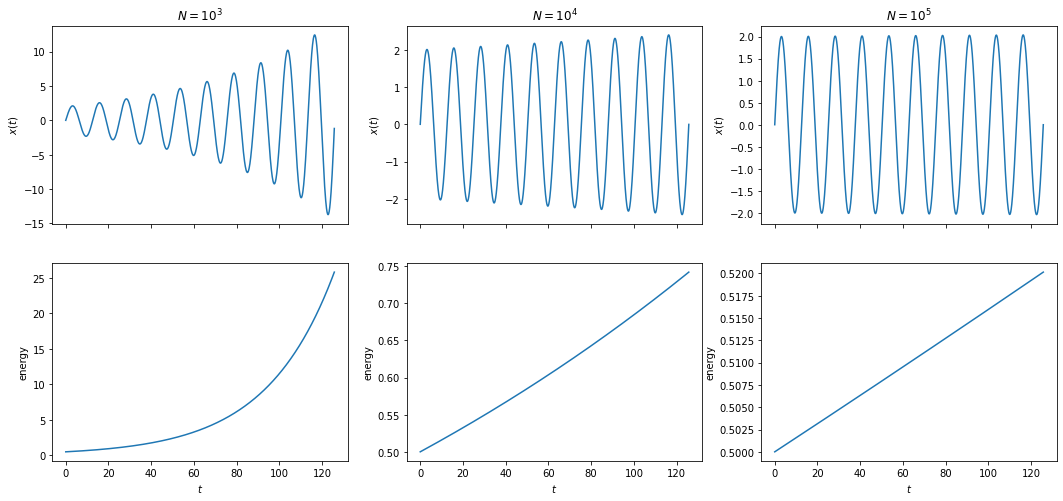

In [20]:
tmax = 40*np.pi
x0 = np.array([0]) #let's not worry about units for now
v0 = np.array([1])
omega = 1/2
m = 1
k = omega**2 * m 

def restoring_force(x,v,t):
    return -omega**2*x


f, axes_array = plt.subplots(2, 3, sharex=True, figsize=(18,8))

Ns = [3,4,5] # N = 10^Ns[i]

for i in range(3):
    times = np.linspace(0, tmax, 10**Ns[i])
    x,v = euler_method(times, x0, v0, restoring_force)
    energy = (np.sum(k*x**2, axis=1) + np.sum(m*v**2, axis=1))/2
    
    axes_array[0][i].plot(times, x)
    axes_array[0][i].set_title(f"$N=10^{Ns[i]}$")
    axes_array[0][i].set_ylabel("$x(t)$")
    axes_array[1][i].plot(times, energy)
    axes_array[1][i].set_xlabel("$t$")
    axes_array[1][i].set_ylabel("energy")

## Now with Scipy's ODE solver

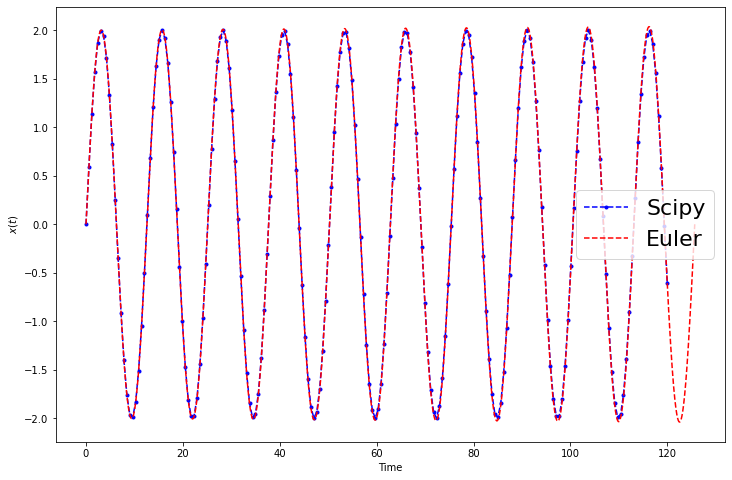

In [45]:
from scipy.integrate import odeint

def dU_dx(U, x):
    # Here U is a vector such that y=U[0] and z=U[1]. define z = y'. This function should return [y', z']
    y = U[0] 
    z = U[1]
    return [z, - omega**2 * y]

U0 = [0, 1] # initial conditions y0 = 0, v_0 = 1   

xs = np.linspace(0, 120, 200)
Us = odeint(dU_dx, U0, xs)
ys = Us[:,0]

plt.figure(figsize=(12,8))
plt.plot(xs,ys, 'b--.', label="Scipy")
plt.plot(times, x, 'r--', label="Euler")
plt.ylabel("$x(t)$")
plt.xlabel("Time")
plt.legend(fontsize=22)
plt.show()
